In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


اولین مرحله اضافه کردن کتابخانه های مورد نیاز است 

In [2]:
import os
import shutil
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from zipfile import ZipFile
import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
np.random.seed(42)
import random
random.seed(42)
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Dense, BatchNormalization, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

import datetime
import os
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Dropout,BatchNormalization,Activation,Flatten,MaxPool2D
from tensorflow.keras.callbacks import EarlyStopping
from PIL import Image
import matplotlib.pyplot as plt
import csv
import random
import cv2
from tqdm import tqdm

import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D , MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

from sklearn.metrics import ConfusionMatrixDisplay as CMD
from sklearn.metrics import confusion_matrix
from keras import optimizers
from keras.preprocessing.image import  ImageDataGenerator as IDG
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
np.random.seed(42)

from matplotlib import style
style.use('fivethirtyeight')

np.random.seed(1234)

در این جا من سه مسیر برای دریافت ورودی تعریف میکنم 

مسیر اول همان مسیر پوشه ای است که در درایو خود ایجاد کردم و فایل را به صورت غیر زیپ اپلود کردم که تیکه کد برای خروج از زیپ نباشد (با توجه به مشکلاتی از جمله کامل از پک در نیامدن و...)

مسیر دوم مسیر پوشه داده های اموزشی است برای دریافت داده های اموزشی و سپس تقسیم متناسب برای داده های ارزیابی است

مسیر سوم هم برای داده های تست است که به خاطر گویا شدن کد نام گذاری شده است 

و در اخر چون از من خواسته داده های ورودی به شبکه را 30*30 همراه با عمق تصویر 3 که نشان دهنده سه فاکتور تصویر گرفته شده است و رنگی بود اینگونه پارامتر ها را تنظیم کرده ام تا در جلوتر نیاز به تنظیم دائم نباشد

In [4]:
data_dir = '/content/drive/MyDrive/hw03/German-Traffic-Signs-Dataset-GTSRB-master'
train_path = '/content/drive/MyDrive/hw03/German-Traffic-Signs-Dataset-GTSRB-master/Train'
test_path = '/content/drive/MyDrive/hw03/German-Traffic-Signs-Dataset-GTSRB-master/'
IMG_HEIGHT = 30
IMG_WIDTH = 30
channels = 3

In [5]:
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

43

In [6]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

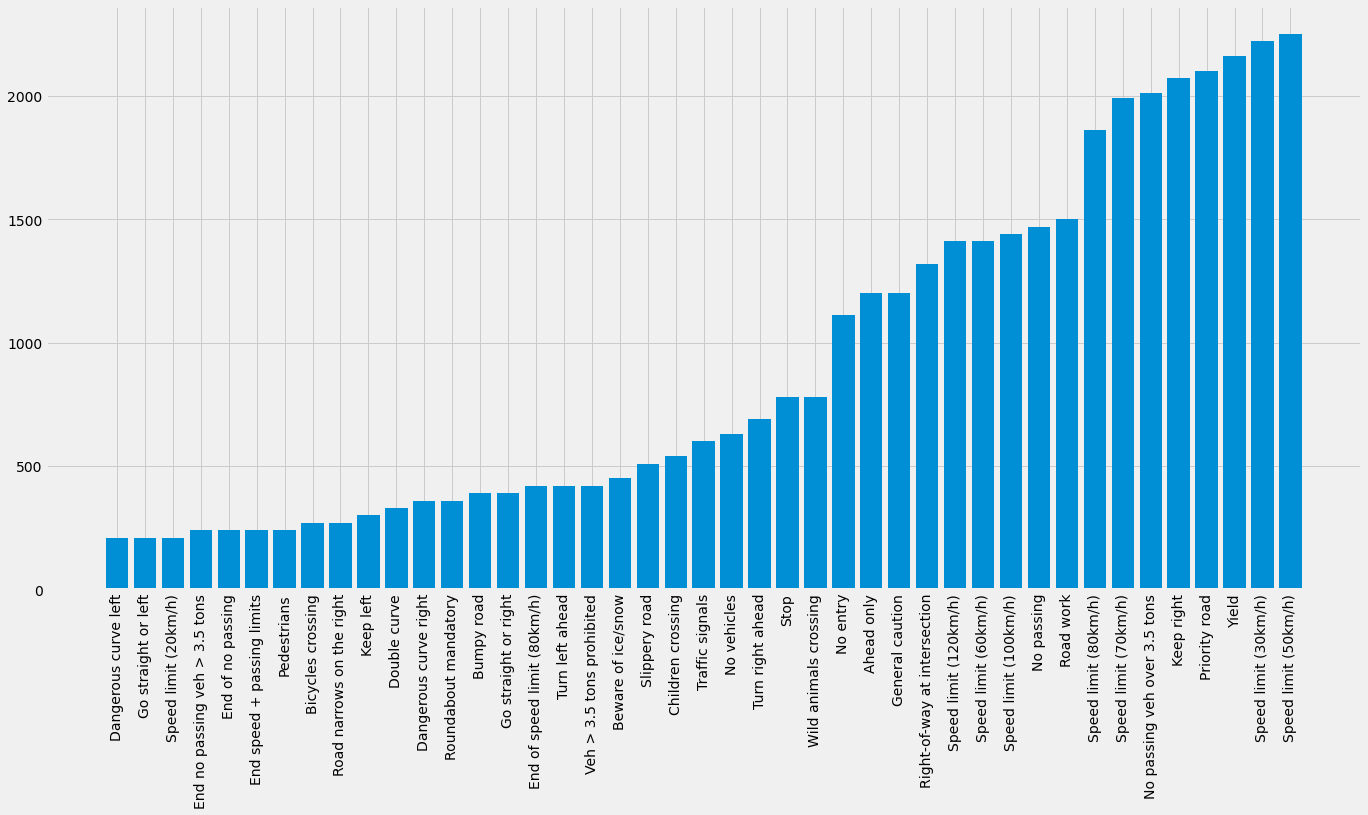

In [7]:
folders = os.listdir(train_path)

train_number = []
class_num = []

for folder in folders:
    train_files = os.listdir(train_path + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])
    
zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [ list(tuple) for tuple in  tuples]

plt.figure(figsize=(21,10))  
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

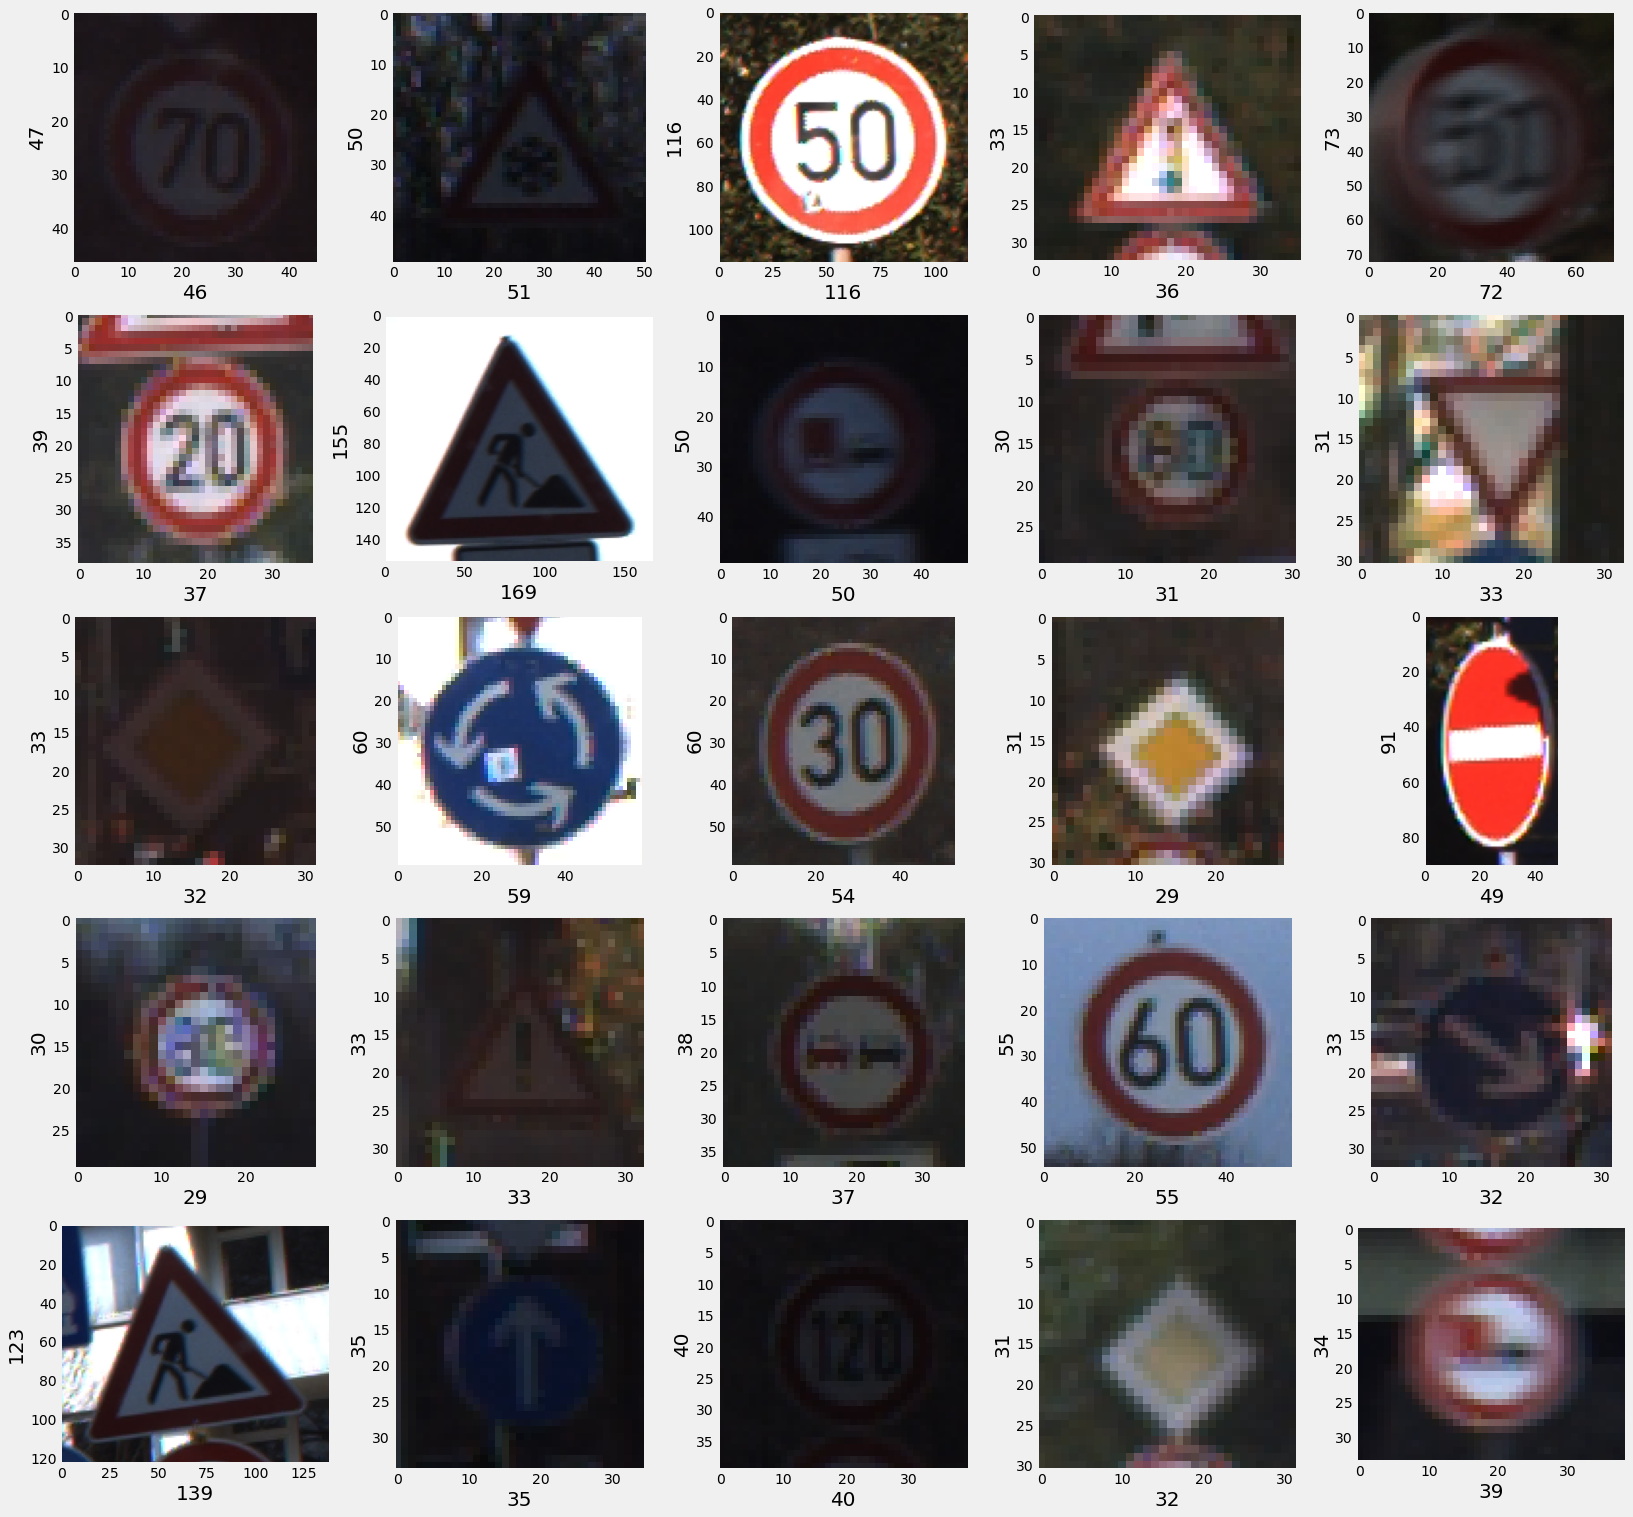

In [8]:
import random
from matplotlib.image import imread

test = pd.read_csv(data_dir + '/Test.csv')
imgs = test["Path"].values

plt.figure(figsize=(25,25))

for i in range(1,26):
    plt.subplot(5,5,i)
    random_img_path = data_dir + '/' + random.choice(imgs)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    plt.grid(b=None)
    plt.xlabel(rand_img.shape[1], fontsize = 20)
    plt.ylabel(rand_img.shape[0], fontsize = 20)

در اینجا با توجه به پارامتر های داده شده تصاویر را از مسیر استخراج کرده ام و بعد تصاویر را با عمق سه و 30*30 ذخیره کرده ام 

In [9]:
image_data = []
image_labels = []

for i in range(NUM_CATEGORIES):
    path = data_dir + '/Train/' + str(i)
    images = os.listdir(path)

    for img in images:
        try:
            image = cv2.imread(path + '/' + img)
            image_fromarray = Image.fromarray(image, 'RGB')
            resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
            image_data.append(np.array(resize_image))
            image_labels.append(i)
        except:
            print("Error in " + img)

image_data = np.array(image_data)
image_labels = np.array(image_labels)

print(image_data.shape, image_labels.shape)

(39219, 30, 30, 3) (39219,)


In [10]:
shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)
image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]

در این قسمت چون باید میزان داده های تست و ارزیابی تقریبا یکی باشد همانطور که گفته شد تقریب برابر 80 در صد برای اموزشی 20 برای ارزیابی و 20 درصد برای ازمایشی 

بنابراین در اینجا چون داده های ازمایشی جدا شده مقدار 30 درصد از کل داده های اموزشی را به داده های ارزیابی تقسیم نموده ام تا تقریبا با داده های ازمایشی برابر باشد و تقریب خوبی باش

In [11]:
X_train, X_val, y_train, y_val = train_test_split(image_data, image_labels, test_size=0.3, random_state=42, shuffle=True)

X_train = X_train/255 
X_val = X_val/255

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_val.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_val.shape)

X_train.shape (27453, 30, 30, 3)
X_valid.shape (11766, 30, 30, 3)
y_train.shape (27453,)
y_valid.shape (11766,)


In [12]:
y_train = keras.utils.to_categorical(y_train, NUM_CATEGORIES)
y_val = keras.utils.to_categorical(y_val, NUM_CATEGORIES)

print(y_train.shape)
print(y_val.shape)

(27453, 43)
(11766, 43)


در اینجا من 6 بار با فاکتور های متفاوت مدل خود را ساخته ام و هر کدام را مجزا تست کردم در این مدل بسیار دقت خوبی را خواهیم داشت که در جلو هر فاکتور را توضیح خواهم داد و دلیل انتخاب ان

داده های تصویر ورودی 30*30 است بنابراین سایز ورودی به مدل را 30 در 30 میگذاریم بعد از ان فیلتری که روی تصویر گذاشته ام 3 در 3 است دلیل انتخاب من هم کیفیت پایین تصویر است و همچنین چون کوچک است بعد هر فیلتر خیلی پایین می اید و شبکه ضعیف میشود 

بنابراین تصویر ورودی 30 در 30 فیلتر 3 در 3 است و هر بار که فیلتر روی تصویر اجرا میکنم سایز ان یک پیکسل از اطراف تصویر کسر میشود بنابراین در مجموع تصویر 30 در 30 میشود 28 در 28 

فاکتور بعدی که اضافه شده فاکتور پولینگ است که هدف ان کوچکتر کردن اندازه ماتریس است چون میخواهیم اطلاعات مهمتر را نگه داریم و اطلاعاتی که کمتر برای ما اهمیت دارد را حذف کنیم 

در اینجا مقدار پولینگ را 2 در 2 در نظر گرفتیم و هر بار که اجرا میشود تصویر وارد شده تقسیم بر دو میشود برای مثال بعد فیلتر شدن تصویر 28 در 28 میشود و بعد از اجرای پولینگ تصویر میشود 14 در 14 یعنی نصف شده 

در شبکه های کانولوشن غالبا پولینگ را بعد از چند کانولوشن میگذارند ولی اینجا من بعد هر کانولوشن پولینگ را گذاشته ام در هر دوحالت خوب بودد خروجی ولی من این را انتخاب کردم چون

پارامتر های شبکه های کانولوشن خیلی کم است و چون هدف ما این است که معماری هایی داشته باشیم که تا حد ممکن اندازه فیلتر ها کوچک باشد چون از نظر تعداد پارامتر ها به نفعمان است و همینطور ترجیه میدهیم تا جای ممکن لایه های فولی کانکتد اخر را حذف کنیم و جای ان چیز دیگر بگذاریم چون فولی کانکتد هم پارامتر ها را خیلی زیاد میکند و هم باعص مشکلاتی از جمله بیش برازش میشود من اینجا پویلنگ را بعد هر لایه گذاشتم تا پارامتر ها کم تصویر کوچکتر و ورودی کمتر باشد 

در هر دو حالت دقت برای من یکی شد تقریبا ولی تعداد پارامتر های من کم شد که من به همین دلیل این معماری را انتخاب کردم 

اگر از تابع فعالساز سیگموید استفاده کنیم همگرا شدن شبکه عصبی به یک جواب درست به کندی و ارام صورت خواهد گرفت و نیز با ناپدیدشدن گرادیان رو به رو هستیم. همچنین خروجی این تابع صفر محور نیست زیرا خروجی ان بین صفر و یک است به عبارت دیگر میانگین ان صفر نمیباشد این امر باعث می شود به روزرسانی شیب در جهت های مختلف خیلی زیاد پیش برود

اما اگر از تابع فعالساز تانژانت هایپر بولیک استفاده کنیم میانگین شیب در ان صفر است به عبارت دیگر به دلیل انکه خروجی این تابع بین منفی یک و یک است میتوان گفت خروجی ان صفر محور است در نتیجه بهینه سازی به وسیله ان راحت تر است اما همچنان در این تابع هم همانند قبل مشکل محو گرادیان خواهیم داشت اما میتوان گفت استفاده از این تابع باز هم نسبت به سیگموید بهتر است و نتیجه بهتر و درستری میدهد 

تابع فعالساز رلو بسیار ساده و کارامد میباشد. در این تابع به ازای مقادیر کوچکتر از صفر خروجی تابع
برابر با صفر است. بنابراین در این بخش هم خروجی تابع و هم شیب آن صفر می باشد. به عبارتی می توان گفت در
این تابع از بازه ی اعداد حقیقی به درستی استفاده نمی کنیم و به دلیل وجود شیب صفر در قسمتی از آن، در بهینه سازی هایی که با شیب کار میکنند سرعت این تابع بهتر تانژانت هایپربولیک کمتر خواهد بود. 

به طور کلی درصورتی که تعداد لایه های شبکه عصبی زیاد باشد سرعت همگرایی ان از تابع تانژانت هایپربولیک به مراتب بیشتر خواهد بود همچنین در این تابع برخلاف دو تابع قبلی با مشکل محو گرادیان یا ناپدید شدن گرادیان رو به رو نیستیم 

محدودیت تابع رلو این است که تنها میتوان در لایه های مخفی یک شبکه عصبی استفاده کرد

در اینجا تابع تانژانت هایپربولیک برای این تعداد لایه مخفی مناسب تر بود اما در رلو مشکل محو گرادیان نداریم اما سرعت کمتری داشت

معماری شبکه:

stride size = 1 for all layers

Input: 30x30x3

Conv2d(32, 3, 3) → 28x28x32

Mxpoll(2, 2) → 14x14x32


Conv2d(64, 3, 3) → 12x12x64


Mxpoll(2, 2) → 6x6x64


Conv2d(128, 3, 3) → 4x4x128


Mxpoll(2, 2) → 2x2x128


Flatten() → 512


Dense(512, 128) → 128


Dense(128, 43) → 43

In [ ]:
n_classes=43
def create_model(activation_function):
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3),activation= activation_function , input_shape=(30, 30, 3))) # 28x28x32
  model.add(MaxPooling2D(pool_size=(2, 2))) # 14x14x32

  model.add(Conv2D(64, kernel_size=(3, 3), activation=activation_function)) # 12x12x64
  model.add(MaxPooling2D(pool_size=(2, 2))) # 6x6x64

  model.add(Conv2D(128, kernel_size=(3, 3), activation=activation_function)) #4x4x128
  model.add(MaxPooling2D(pool_size=(2, 2))) #2x2x128
  model.add(Flatten())

  model.add(Dense(128, activation=activation_function))
  model.add(Dense(n_classes, activation='softmax'))
  return model

In [ ]:
modela = create_model('relu')
modela.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
historya = modela.fit(X_train, y_train, validation_data=(X_val, y_val), epochs = 3)

Epoch 1/3
858/858 [==============================] - 44s 50ms/step - loss: 1.4538 - accuracy: 0.5947 - val_loss: 0.3851 - val_accuracy: 0.8880
Epoch 2/3
858/858 [==============================] - 43s 50ms/step - loss: 0.2047 - accuracy: 0.9405 - val_loss: 0.1449 - val_accuracy: 0.9594
Epoch 3/3
858/858 [==============================] - 43s 50ms/step - loss: 0.0804 - accuracy: 0.9764 - val_loss: 0.1054 - val_accuracy: 0.9721


In [ ]:
from sklearn.metrics import classification_report

y_pred = modela.predict(X_train)

y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_train, axis=1)

confusion_matrix(y_pred,y_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       138
           1       0.98      1.00      0.99      1545
           2       0.85      1.00      0.91      1530
           3       0.90      0.99      0.94      1001
           4       0.98      1.00      0.99      1427
           5       1.00      0.72      0.83      1318
           6       1.00      0.98      0.99       293
           7       0.98      0.96      0.97      1000
           8       0.99      0.99      0.99      1001
           9       0.99      1.00      0.99      1043
          10       1.00      1.00      1.00      1453
          11       1.00      0.99      0.99       912
          12       1.00      1.00      1.00      1466
          13       1.00      1.00      1.00      1494
          14       1.00      0.99      1.00       529
          15       1.00      0.97      0.99       432
          16       1.00      1.00      1.00       293
          17       1.00    

In [ ]:
from sklearn.metrics import classification_report

y_pred = modela.predict(X_val)

y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_val, axis=1)

confusion_matrix(y_pred,y_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95        72
           1       0.98      0.99      0.99       675
           2       0.84      0.99      0.91       720
           3       0.90      0.99      0.94       409
           4       0.99      1.00      0.99       563
           5       0.99      0.68      0.81       542
           6       0.98      0.98      0.98       127
           7       0.97      0.96      0.97       440
           8       0.96      0.99      0.98       409
           9       0.98      1.00      0.99       427
          10       0.99      0.99      0.99       557
          11       0.99      0.98      0.99       408
          12       1.00      0.99      0.99       634
          13       1.00      1.00      1.00       666
          14       1.00      0.97      0.99       251
          15       1.00      0.99      0.99       198
          16       0.98      1.00      0.99       127
          17       0.99    

همانطور که مشاهده کردیم معیار های ارزیابی هم برای داده های ارزیابی و هم برای داده های اموزشی که مدل را روی ان ها ساختیم تقریبا یکی است و مشکلاتی از جمله بیش برازش که در شبکه های فولی کانکت داشتیم را اینجا نداریم و مدل خوبی ساخته شد

از انجا که زمان تمرین محدود بود من داده ها را در 3 ایپوک خروجی گرفتم میشد بیشتر هم ادامه داد 

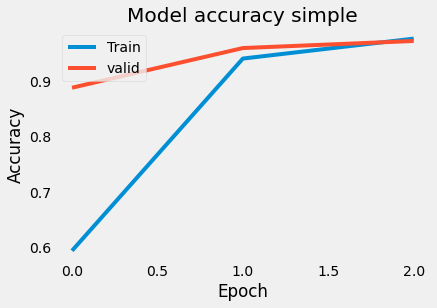

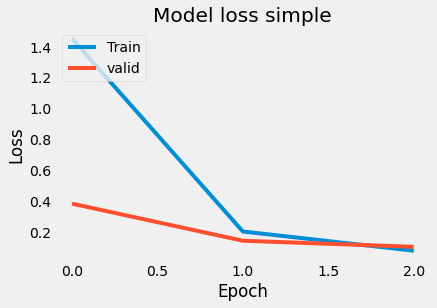

In [ ]:
plt.plot(historya.history['accuracy'])
plt.plot(historya.history['val_accuracy'])
plt.title('Model accuracy simple')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'valid'], loc='upper left')
plt.grid()
plt.show()

# Plot training & validation loss values
plt.plot(historya.history['loss'])
plt.plot(historya.history['val_loss'])
plt.title('Model loss simple')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'valid'], loc='upper left')
plt.grid()
plt.show()

In [ ]:
modela.save("/content/drive/MyDrive/hw03/TrainedModel0.h5")

In [ ]:
#from keras.models import load_model
#loaded_model = load_model("/content/drive/MyDrive/HW02/HW/TrainedModel0.h5")

برای تنظیم هایپر پارامتر ها که شامل نرخ اموزشی و همچنین سایز بچ قواعدی داریم که قوعد کلی هستند هر چند ممکن هست هر قاعده در یک دیتاست استفاده شود اما به طور کلی 

برای تنظیم هایپر پارامتر ها ابتداد مدل را برای نرخ یادگیری رندوم انتخاب میکنیم و بعد به مقدار تغییرات لاس دقت میکنیم اگر خیلی کم در حال تغییر بود مقدار نخ یادگیری را کمی افزایش میدهیم و باز دوباره اجرا میکنیم تا زمانی که مقدار تابع لاس ما مقدار خوبی باشد بعد از ان فاکتور سایز بچ را کمی کمتر میکنیم و اجرا میگیریم تا دقت افزایش یابد 

دلیل این هم این است که اول با یک بچ بزرگ این پارامتر را طوری تنظیم میکنیم که بررای شبکه ما عاقلانه مقدار لاس تنظیم شود  و سریع بفهمیم بعد که فهمیدیم میرویم سراغ سایز بچ و ان را تنظیم میکنیم 

تا هم زمان و هم هزینه را کاهش دهیم در اینجا من اول نرخ یادگیری را برای مقادیر مختلف در نظر گرفتم و بعد به مقدار لاس در هر ایپوک دقت کردم 

وقتی تغییرات لاس نه خیلی زیاد و نه خیلی کم بود سایز بچ را کم کردم و دقت افزایش یافت 

In [ ]:
#learning_rate=0.001,0.01,0.1
modela = create_model('relu')
modela.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.00001),loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
historya = modela.fit(X_train, y_train, validation_data=(X_val, y_val), epochs = 1)

858/858 [==============================] - 48s 55ms/step - loss: 3.7675 - accuracy: 0.0600 - val_loss: 3.7660 - val_accuracy: 0.0665


In [ ]:
historya = modela.fit(X_train, y_train, validation_data=(X_val, y_val),batch_size=128, epochs = 3)

Epoch 1/3
215/215 [==============================] - 39s 180ms/step - loss: 3.7619 - accuracy: 0.0379 - val_loss: 3.7617 - val_accuracy: 0.0392
Epoch 2/3
215/215 [==============================] - 36s 166ms/step - loss: 3.7618 - accuracy: 0.0378 - val_loss: 3.7616 - val_accuracy: 0.0392
Epoch 3/3
215/215 [==============================] - 35s 164ms/step - loss: 3.7616 - accuracy: 0.0379 - val_loss: 3.7614 - val_accuracy: 0.0393


In [ ]:
#learning_rate=0.001,0.01,0.1
modela = create_model('relu')
modela.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),loss='categorical_crossentropy', metrics=['accuracy'])
historya = modela.fit(X_train, y_train, validation_data=(X_val, y_val),batch_size=128, epochs = 3)

Epoch 1/3
215/215 [==============================] - 36s 163ms/step - loss: 3.7570 - accuracy: 0.0324 - val_loss: 3.7468 - val_accuracy: 0.0296
Epoch 2/3
215/215 [==============================] - 35s 162ms/step - loss: 3.7398 - accuracy: 0.0297 - val_loss: 3.7293 - val_accuracy: 0.0314
Epoch 3/3
215/215 [==============================] - 37s 173ms/step - loss: 3.7215 - accuracy: 0.0419 - val_loss: 3.7089 - val_accuracy: 0.0527


In [ ]:
#learning_rate=0.001,0.01,0.1
modela = create_model('relu')
modela.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),loss='categorical_crossentropy', metrics=['accuracy'])
historya = modela.fit(X_train, y_train, validation_data=(X_val, y_val),batch_size=128, epochs = 3)

Epoch 1/3
215/215 [==============================] - 36s 165ms/step - loss: 3.6581 - accuracy: 0.0555 - val_loss: 3.5385 - val_accuracy: 0.0682
Epoch 2/3
215/215 [==============================] - 35s 163ms/step - loss: 3.4983 - accuracy: 0.0702 - val_loss: 3.4636 - val_accuracy: 0.1022
Epoch 3/3
215/215 [==============================] - 36s 167ms/step - loss: 3.4370 - accuracy: 0.1149 - val_loss: 3.3958 - val_accuracy: 0.1248


In [ ]:
#learning_rate=0.001,0.01,0.1
modela = create_model('relu')
modela.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),loss='categorical_crossentropy', metrics=['accuracy'])
historya = modela.fit(X_train, y_train, validation_data=(X_val, y_val),batch_size=128, epochs = 3)

Epoch 1/3
215/215 [==============================] - 40s 184ms/step - loss: 3.4241 - accuracy: 0.0971 - val_loss: 3.2747 - val_accuracy: 0.1376
Epoch 2/3
215/215 [==============================] - 40s 186ms/step - loss: 2.0400 - accuracy: 0.4357 - val_loss: 1.2650 - val_accuracy: 0.5904
Epoch 3/3
215/215 [==============================] - 36s 166ms/step - loss: 0.7733 - accuracy: 0.7709 - val_loss: 0.7245 - val_accuracy: 0.7974


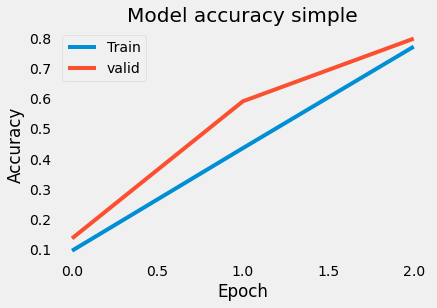

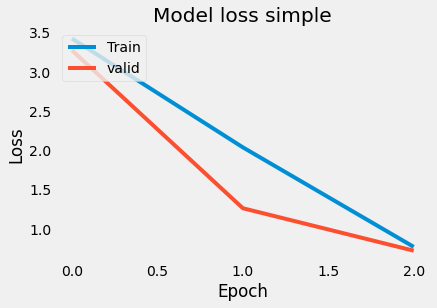

In [ ]:
plt.plot(historya.history['accuracy'])
plt.plot(historya.history['val_accuracy'])
plt.title('Model accuracy simple')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'valid'], loc='upper left')
plt.grid()
plt.show()

# Plot training & validation loss values
plt.plot(historya.history['loss'])
plt.plot(historya.history['val_loss'])
plt.title('Model loss simple')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'valid'], loc='upper left')
plt.grid()
plt.show()

In [ ]:
#learning_rate=0.001,0.01,0.1
modela = create_model('relu')
modela.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),loss='categorical_crossentropy', metrics=['accuracy'])
historya = modela.fit(X_train, y_train, validation_data=(X_val, y_val),batch_size=64, epochs = 3)

Epoch 1/3
429/429 [==============================] - 40s 91ms/step - loss: 2.7342 - accuracy: 0.2640 - val_loss: 1.4607 - val_accuracy: 0.5572
Epoch 2/3
429/429 [==============================] - 38s 88ms/step - loss: 0.6790 - accuracy: 0.7982 - val_loss: 0.3360 - val_accuracy: 0.9012
Epoch 3/3
429/429 [==============================] - 38s 88ms/step - loss: 0.2303 - accuracy: 0.9341 - val_loss: 0.1393 - val_accuracy: 0.9636


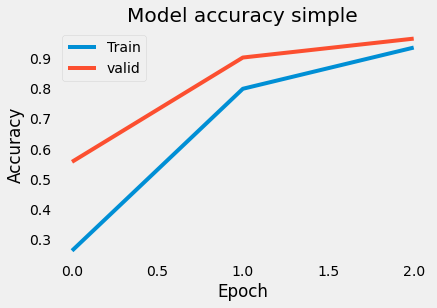

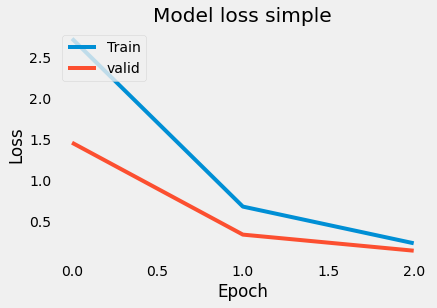

In [ ]:
plt.plot(historya.history['accuracy'])
plt.plot(historya.history['val_accuracy'])
plt.title('Model accuracy simple')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'valid'], loc='upper left')
plt.grid()
plt.show()

# Plot training & validation loss values
plt.plot(historya.history['loss'])
plt.plot(historya.history['val_loss'])
plt.title('Model loss simple')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'valid'], loc='upper left')
plt.grid()
plt.show()

In [ ]:
modela.save("/content/drive/MyDrive/hw03/TrainedModel1.h5")

در این قسمت از من خواسته شده 3 مورد از توابع بهینه ساز را برای مدل خود تست کنم و نمودارهای خطا و دقت را رسم و روی ان بررسی کنم

توابع بهینه ساز متفاوتی وجود دارد از جمله توابع پر کاربرد و در دسترس

SGD ---
RMSprop ---
Adam ---
Adadelta ---
Adagrad ---
Adamax ---
Nadam ---
Ftrl ---

در اینجا من سه تابع بهینه ساز اول را روی داده های خود تست میکنم

در اینجا همانطور که در نمودار ها دیده میشود و با دقت به مقدار دقت در هر ایپوک میبینیم 

تابع بهینه ساز اس جی دی خیلی زمان بیشتری برای رسیدن به نقطه ایده ال نسبت به ادام و ارمستراپ میرود

و مسیر طولانی تریی را طی میکند 

همینطور باز ارمستراپ کمی بهتر از ادام است 

In [ ]:
#optimizer=SGD,Adam,RMSprop
modela = create_model('relu')
modela.compile(optimizer='SGD',loss='categorical_crossentropy', metrics=['accuracy'])
historya = modela.fit(X_train, y_train, validation_data=(X_val, y_val), epochs = 10)

Epoch 1/10
858/858 [==============================] - 45s 52ms/step - loss: 3.5000 - accuracy: 0.0896 - val_loss: 3.3211 - val_accuracy: 0.1981
Epoch 2/10
858/858 [==============================] - 42s 50ms/step - loss: 2.8204 - accuracy: 0.2643 - val_loss: 2.2388 - val_accuracy: 0.3972
Epoch 3/10
858/858 [==============================] - 42s 49ms/step - loss: 1.6555 - accuracy: 0.5311 - val_loss: 1.2402 - val_accuracy: 0.6568
Epoch 4/10
858/858 [==============================] - 42s 49ms/step - loss: 0.9055 - accuracy: 0.7480 - val_loss: 0.7174 - val_accuracy: 0.8011
Epoch 5/10
858/858 [==============================] - 42s 49ms/step - loss: 0.5703 - accuracy: 0.8423 - val_loss: 0.4967 - val_accuracy: 0.8644
Epoch 6/10
858/858 [==============================] - 43s 50ms/step - loss: 0.4012 - accuracy: 0.8889 - val_loss: 0.3914 - val_accuracy: 0.8961
Epoch 7/10
858/858 [==============================] - 42s 49ms/step - loss: 0.2985 - accuracy: 0.9177 - val_loss: 0.3300 - val_accuracy:

In [ ]:
modela.save("/content/drive/MyDrive/hw03/TrainedModel2.h5")

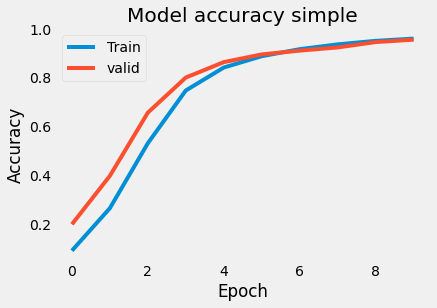

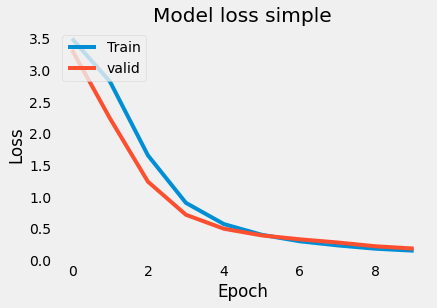

In [ ]:
plt.plot(historya.history['accuracy'])
plt.plot(historya.history['val_accuracy'])
plt.title('Model accuracy simple')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'valid'], loc='upper left')
plt.grid()
plt.show()

# Plot training & validation loss values
plt.plot(historya.history['loss'])
plt.plot(historya.history['val_loss'])
plt.title('Model loss simple')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'valid'], loc='upper left')
plt.grid()
plt.show()

In [ ]:
#optimizer=SGD,Adam,RMSprop
modela = create_model('relu')
modela.compile(optimizer='Adam',loss='categorical_crossentropy', metrics=['accuracy'])
historya = modela.fit(X_train, y_train, validation_data=(X_val, y_val), epochs = 10)

Epoch 1/10
858/858 [==============================] - 52s 60ms/step - loss: 1.4848 - accuracy: 0.5782 - val_loss: 0.3779 - val_accuracy: 0.8938
Epoch 2/10
858/858 [==============================] - 43s 50ms/step - loss: 0.2523 - accuracy: 0.9283 - val_loss: 0.1830 - val_accuracy: 0.9487
Epoch 3/10
858/858 [==============================] - 43s 50ms/step - loss: 0.1222 - accuracy: 0.9664 - val_loss: 0.1001 - val_accuracy: 0.9774
Epoch 4/10
858/858 [==============================] - 43s 50ms/step - loss: 0.0771 - accuracy: 0.9780 - val_loss: 0.0768 - val_accuracy: 0.9816
Epoch 5/10
858/858 [==============================] - 43s 50ms/step - loss: 0.0513 - accuracy: 0.9850 - val_loss: 0.0714 - val_accuracy: 0.9827
Epoch 6/10
858/858 [==============================] - 56s 66ms/step - loss: 0.0381 - accuracy: 0.9881 - val_loss: 0.0892 - val_accuracy: 0.9801
Epoch 7/10
858/858 [==============================] - 43s 50ms/step - loss: 0.0309 - accuracy: 0.9908 - val_loss: 0.0808 - val_accuracy:

In [ ]:
modela.save("/content/drive/MyDrive/hw03/TrainedModel3.h5")

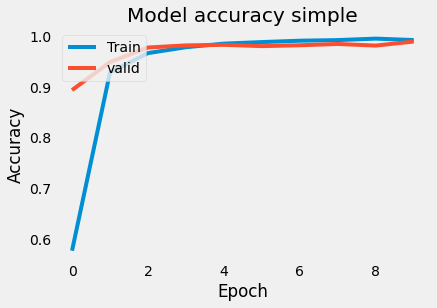

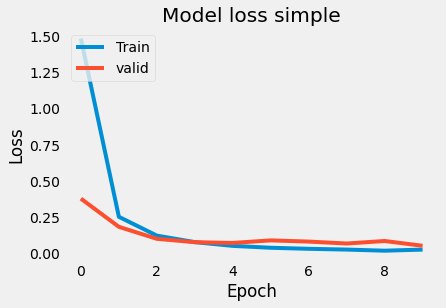

In [ ]:
plt.plot(historya.history['accuracy'])
plt.plot(historya.history['val_accuracy'])
plt.title('Model accuracy simple')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'valid'], loc='upper left')
plt.grid()
plt.show()

# Plot training & validation loss values
plt.plot(historya.history['loss'])
plt.plot(historya.history['val_loss'])
plt.title('Model loss simple')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'valid'], loc='upper left')
plt.grid()
plt.show()

In [ ]:
#optimizer=SGD,Adam,RMSprop
modela = create_model('relu')
modela.compile(optimizer='RMSprop',loss='categorical_crossentropy', metrics=['accuracy'])
historya = modela.fit(X_train, y_train, validation_data=(X_val, y_val), epochs = 10)

Epoch 1/10
858/858 [==============================] - 56s 65ms/step - loss: 1.3194 - accuracy: 0.6306 - val_loss: 0.2512 - val_accuracy: 0.9339
Epoch 2/10
858/858 [==============================] - 43s 50ms/step - loss: 0.1774 - accuracy: 0.9483 - val_loss: 0.1047 - val_accuracy: 0.9702
Epoch 3/10
858/858 [==============================] - 43s 50ms/step - loss: 0.0709 - accuracy: 0.9803 - val_loss: 0.0537 - val_accuracy: 0.9869
Epoch 4/10
858/858 [==============================] - 44s 51ms/step - loss: 0.0393 - accuracy: 0.9884 - val_loss: 0.0704 - val_accuracy: 0.9841
Epoch 5/10
858/858 [==============================] - 43s 50ms/step - loss: 0.0261 - accuracy: 0.9924 - val_loss: 0.0762 - val_accuracy: 0.9843
Epoch 6/10
858/858 [==============================] - 44s 51ms/step - loss: 0.0191 - accuracy: 0.9947 - val_loss: 0.1053 - val_accuracy: 0.9765
Epoch 7/10
858/858 [==============================] - 43s 50ms/step - loss: 0.0166 - accuracy: 0.9958 - val_loss: 0.0541 - val_accuracy:

In [ ]:
modela.save("/content/drive/MyDrive/hw03/TrainedModel4.h5")

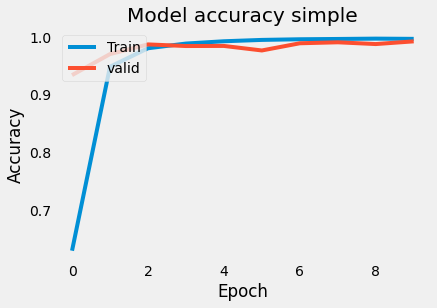

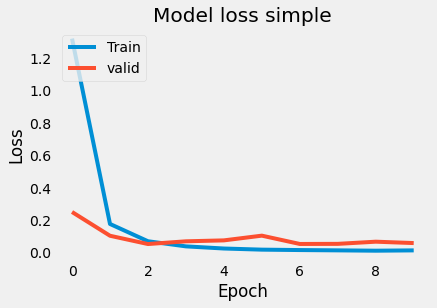

In [ ]:
plt.plot(historya.history['accuracy'])
plt.plot(historya.history['val_accuracy'])
plt.title('Model accuracy simple')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'valid'], loc='upper left')
plt.grid()
plt.show()

# Plot training & validation loss values
plt.plot(historya.history['loss'])
plt.plot(historya.history['val_loss'])
plt.title('Model loss simple')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'valid'], loc='upper left')
plt.grid()
plt.show()

در اینجا از ما خواسته شده معیارهای ارزیابی را روی داده های تست گزارش کنیم 

همانند حالت قبل داداه ها را از ورودی دریافت میکنیم و چون مدل ساخته شده روی ورودی 30 در 30 بود اینجا هم نیاز از 30 در 30 کنیم و بعد مقدار معیار های ارزیابی را محاسبه میکنیم

In [ ]:
test = pd.read_csv(data_dir + '/Test.csv')

labels = test["ClassId"].values
imgs = test["Path"].values

data =[]

for img in imgs:
    try:
        image = cv2.imread(data_dir + '/' +img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
        data.append(np.array(resize_image))
    except:
        print("Error in " + img)
X_test = np.array(data)
X_test = X_test/255


In [ ]:
shuffle_indexes = np.arange(X_test.shape[0])
np.random.shuffle(shuffle_indexes)
X_test = X_test[shuffle_indexes]
labels = labels[shuffle_indexes]

print(X_test.shape, labels.shape)

(12630, 30, 30, 3) (12630,)


In [ ]:
len(labels)

12630

In [ ]:
labels = keras.utils.to_categorical(labels, NUM_CATEGORIES)
print(labels.shape)


In [ ]:
from sklearn.metrics import classification_report

y_pred = modela.predict(X_test)

y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(labels, axis=1)

confusion_matrix(y_pred,y_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.80      0.88        60
           1       0.94      0.98      0.96       720
           2       0.96      0.95      0.96       750
           3       0.94      0.95      0.95       450
           4       0.96      0.99      0.97       660
           5       0.92      0.90      0.91       630
           6       0.99      0.83      0.91       150
           7       0.95      0.91      0.93       450
           8       0.95      0.96      0.95       450
           9       0.96      0.96      0.96       480
          10       1.00      0.98      0.99       660
          11       0.97      0.95      0.96       420
          12       0.96      0.97      0.97       690
          13       0.98      0.99      0.99       720
          14       1.00      1.00      1.00       270
          15       0.96      1.00      0.98       210
          16       0.96      0.99      0.97       150
          17       1.00    

در اینجا از ما خواسته شده مدل را هم با دراپاوت هم بدون انن تست کنیم 

در اینجا من دو تابع تعریف کردم یکی همون مدل قبل و دیگری مدل قبل همراه با دراپ اوت 

دراپ اوت روشی است که نورون های منتخب به طور تصادفی در طول آموزش نادیده گرفته می شوند. به عبارت
دیگر این نورون ها بطور تصادفی کنار گذاشته می شوند. این بدان معنی است که سهم آنها در فعال شدن نورون های
پایین دست به صورت موقت در گذرگاه جلو برداشته می شود و هیچ گونه به روزرسانی وزنی بر روی نورون در فوروارد پس اعمال نمیگردد 

همانطور که یک شبکه عصبی می آموزد ، وزن نورون درون بافت خود در شبکه قرار می گیرد. وزن سلولهای
عصبی برای ویژگی های خاصی تنظیم شده است که تخصص خاصی را ارائه می دهند. نورون های همسایه به این تخصص تکیه می کنند ، که اگر خیلی دور برداشته شود، می تواند منجر به یک مدل شکننده بیش از حد خاص به داده
های آموزش شود.
اگر نورون ها هنگام آموزش به طور تصادفی از شبکه خارج شوند ، دیگر سلول های عصبی باید در جایگاه های
مورد نیاز برای پیش بینی نورون های مفقود شده گام بردارند و شرایط را کنترل کنند. در این شرایط می توان گفت
چندین

representation 

داخلی مستقل توسط شبکه آموزش داده می شود

در نتیجه ی این اقدام، شبکه نسبت به وزن مخصوص نورون ها حساسیت کمتری پیدا می کند. این به نوبه خود منجر
به شبکه ای می شود که بتواند تعمیم بهتری داشته باشد و نیز احتمال آنکه بر روی داده های آموزش بیش برازش یا اورفیت داشته باشیم کمتر میشود

به طور کلی میتوان گفت دراپ اوت یک شبکه عصبی را مجبور به یادگیری ویژگی های قوی تر می کند که در
رابطه با بسیاری از زیر مجموعه های مختلف تصادفی نورون های دیگر مفید هستند. همچنین این روش تقریبا تعداد 
تکرارهای مورد نیاز برای همگرایی را دو برابر می کند.

اگر مدل من دارای بیش برازش باشد اثر ان را کم میکند ولی اگر نداشته باشد دچار کم برازشی یا اندرفیت میکند که مدل من نیاز نداشت همانطور که میبینید

In [ ]:
n_classes=43
def create_model(activation_function):
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3),activation= activation_function , input_shape=(30, 30, 3))) # 28x28x32
  model.add(MaxPooling2D(pool_size=(2, 2))) # 14x14x32

  model.add(Conv2D(64, kernel_size=(3, 3), activation=activation_function)) # 12x12x64
  model.add(MaxPooling2D(pool_size=(2, 2))) # 6x6x64

  model.add(Conv2D(128, kernel_size=(3, 3), activation=activation_function)) #4x4x128
  model.add(MaxPooling2D(pool_size=(2, 2))) #2x2x128
  model.add(Flatten())

  model.add(Dense(128, activation=activation_function))
  model.add(Dense(n_classes, activation='softmax'))
  return model

In [ ]:
def create_drop_out_model(n_classes = 43):
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3),activation= 'relu' , input_shape=(30, 30, 3))) # 28x28x32
  model.add(MaxPooling2D(pool_size=(2, 2))) # 14x14x32

  model.add(Conv2D(64, kernel_size=(3, 3), activation='relu')) # 12x12x64
  model.add(MaxPooling2D(pool_size=(2, 2))) # 6x6x64
  model.add(Dropout(0.5))


  model.add(Conv2D(128, kernel_size=(3, 3), activation='relu')) #4x4x128
  model.add(MaxPooling2D(pool_size=(2, 2))) #2x2x128
  model.add(Dropout(0.5))
  model.add(Flatten())

  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(n_classes, activation='softmax'))
  return model

In [ ]:
model_dropless = create_model('relu')
model_dropOut = create_drop_out_model()

model_dropless.compile(optimizer='RMSprop',loss='categorical_crossentropy', metrics=['accuracy'])
model_dropOut.compile(optimizer='RMSprop',loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:

history_model_dropless = model_dropless.fit(X_train, y_train, validation_data=(X_val, y_val), epochs = 10)


Epoch 1/10
858/858 [==============================] - 54s 62ms/step - loss: 1.4394 - accuracy: 0.5967 - val_loss: 0.4050 - val_accuracy: 0.8740
Epoch 2/10
858/858 [==============================] - 48s 55ms/step - loss: 0.1891 - accuracy: 0.9460 - val_loss: 0.1750 - val_accuracy: 0.9499
Epoch 3/10
858/858 [==============================] - 44s 51ms/step - loss: 0.0694 - accuracy: 0.9796 - val_loss: 0.0634 - val_accuracy: 0.9860
Epoch 4/10
858/858 [==============================] - 46s 54ms/step - loss: 0.0422 - accuracy: 0.9883 - val_loss: 0.1864 - val_accuracy: 0.9582
Epoch 5/10
858/858 [==============================] - 44s 52ms/step - loss: 0.0251 - accuracy: 0.9929 - val_loss: 0.0936 - val_accuracy: 0.9810
Epoch 6/10
858/858 [==============================] - 44s 51ms/step - loss: 0.0200 - accuracy: 0.9936 - val_loss: 0.0683 - val_accuracy: 0.9883
Epoch 7/10
858/858 [==============================] - 44s 52ms/step - loss: 0.0167 - accuracy: 0.9955 - val_loss: 0.0603 - val_accuracy:

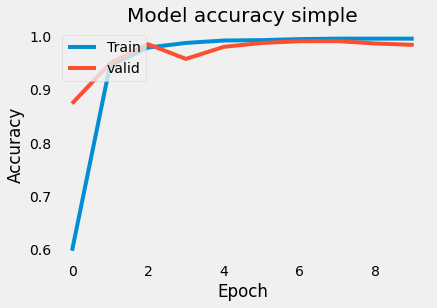

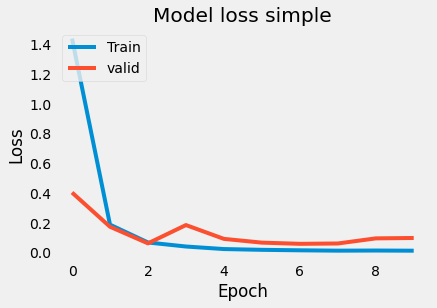

In [ ]:
plt.plot(history_model_dropless.history['accuracy'])
plt.plot(history_model_dropless.history['val_accuracy'])
plt.title('Model accuracy simple')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'valid'], loc='upper left')
plt.grid()
plt.show()

# Plot training & validation loss values
plt.plot(history_model_dropless.history['loss'])
plt.plot(history_model_dropless.history['val_loss'])
plt.title('Model loss simple')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'valid'], loc='upper left')
plt.grid()
plt.show()

In [ ]:
history_model_dropOut = model_dropOut.fit(X_train, y_train, validation_data=(X_val, y_val), epochs = 10)

Epoch 1/10
858/858 [==============================] - 55s 61ms/step - loss: 2.5422 - accuracy: 0.2835 - val_loss: 1.4966 - val_accuracy: 0.5620
Epoch 2/10
858/858 [==============================] - 46s 53ms/step - loss: 1.2564 - accuracy: 0.5977 - val_loss: 0.6054 - val_accuracy: 0.8328
Epoch 3/10
858/858 [==============================] - 45s 52ms/step - loss: 0.7393 - accuracy: 0.7561 - val_loss: 0.2790 - val_accuracy: 0.9266
Epoch 4/10
858/858 [==============================] - 45s 53ms/step - loss: 0.5369 - accuracy: 0.8269 - val_loss: 0.1855 - val_accuracy: 0.9633
Epoch 5/10
858/858 [==============================] - 46s 53ms/step - loss: 0.4459 - accuracy: 0.8608 - val_loss: 0.1266 - val_accuracy: 0.9725
Epoch 6/10
858/858 [==============================] - 46s 54ms/step - loss: 0.3979 - accuracy: 0.8787 - val_loss: 0.0924 - val_accuracy: 0.9793
Epoch 7/10
858/858 [==============================] - 46s 54ms/step - loss: 0.3556 - accuracy: 0.8920 - val_loss: 0.0825 - val_accuracy:

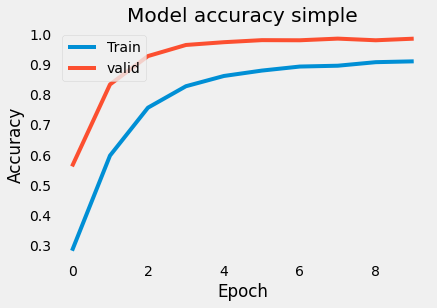

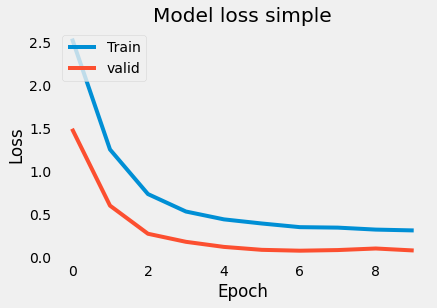

In [ ]:
plt.plot(history_model_dropOut.history['accuracy'])
plt.plot(history_model_dropOut.history['val_accuracy'])
plt.title('Model accuracy simple')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'valid'], loc='upper left')
plt.grid()
plt.show()

# Plot training & validation loss values
plt.plot(history_model_dropOut.history['loss'])
plt.plot(history_model_dropOut.history['val_loss'])
plt.title('Model loss simple')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'valid'], loc='upper left')
plt.grid()
plt.show()

این قسمت از ما خواسته شده تاثیر لایه نرمالسازی را در مدل چک کنیم 

همانند سوال قبل یک تابع مجزا از مدل اصلی طراحی میکنم و  بعد تحلیل میکنم نتایج رو 

دلیل استفاده از لایه نرمالسازی در شبکه های عصبی عمیق اموزش شبکه های عصبی با تعداد لایه زیاد می تواند چالش انگیز باشد. یکی از دلایل این است که توزیع احتمال در
لایه ورودی برای لایه های عمیق تر، پس از هر بروز رسانی وزن ها توسط مینی بچ تغییر میکند بنابراین الگوریتم اموزش در حقیقت هدفی را دنبال میکند که دائما تغییر میکند. این پدیده تغییر توزیع ورودی لایه ها شناخته میشود. 

این تکنیک ورودی هر لایه را استاندارد میکند تاثیر این روش ایستا شدن فرایند اموزش است

In [ ]:
def create_batch_norm_model(n_classes = 43):
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3),activation= 'relu' , input_shape=(30, 30, 3))) # 28x28x32
  model.add(MaxPooling2D(pool_size=(2, 2))) # 14x14x32
  model.add(BatchNormalization())

  model.add(Conv2D(64, kernel_size=(3, 3), activation='relu')) # 12x12x64
  model.add(MaxPooling2D(pool_size=(2, 2))) # 6x6x64
  model.add(Dropout(0.5))
  model.add(BatchNormalization())

  model.add(Conv2D(128, kernel_size=(3, 3), activation='relu')) #4x4x128
  model.add(MaxPooling2D(pool_size=(2, 2))) #2x2x128
  model.add(Dropout(0.5))
  model.add(Flatten())
  model.add(BatchNormalization())

  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(n_classes, activation='softmax'))
  return model

In [ ]:
model_batched = create_batch_norm_model()
model_no_batch = create_model('relu')
model_batched.compile(optimizer='RMSprop',loss='categorical_crossentropy', metrics=['accuracy'])
model_no_batch.compile(optimizer='RMSprop',loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:

history_model_no_batch = model_no_batch.fit(X_train, y_train, validation_data=(X_val, y_val), epochs = 10)


Epoch 1/10
858/858 [==============================] - 64s 73ms/step - loss: 1.3627 - accuracy: 0.6161 - val_loss: 0.3389 - val_accuracy: 0.8999
Epoch 2/10
858/858 [==============================] - 56s 65ms/step - loss: 0.2095 - accuracy: 0.9387 - val_loss: 0.1493 - val_accuracy: 0.9609
Epoch 3/10
858/858 [==============================] - 64s 74ms/step - loss: 0.0808 - accuracy: 0.9766 - val_loss: 0.1651 - val_accuracy: 0.9591
Epoch 4/10
858/858 [==============================] - 55s 65ms/step - loss: 0.0451 - accuracy: 0.9871 - val_loss: 0.1295 - val_accuracy: 0.9657
Epoch 5/10
858/858 [==============================] - 45s 52ms/step - loss: 0.0288 - accuracy: 0.9915 - val_loss: 0.0639 - val_accuracy: 0.9896
Epoch 6/10
858/858 [==============================] - 46s 53ms/step - loss: 0.0239 - accuracy: 0.9930 - val_loss: 0.0562 - val_accuracy: 0.9899
Epoch 7/10
858/858 [==============================] - 45s 53ms/step - loss: 0.0188 - accuracy: 0.9953 - val_loss: 0.0794 - val_accuracy:

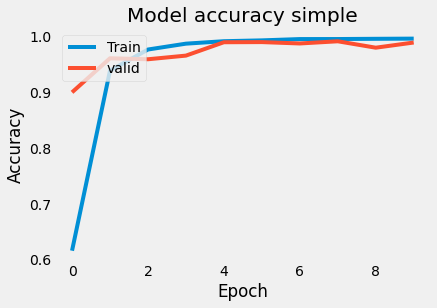

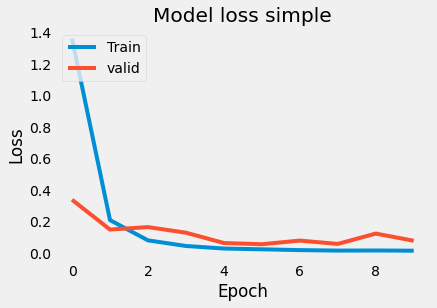

In [ ]:
plt.plot(history_model_no_batch.history['accuracy'])
plt.plot(history_model_no_batch.history['val_accuracy'])
plt.title('Model accuracy simple')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'valid'], loc='upper left')
plt.grid()
plt.show()

# Plot training & validation loss values
plt.plot(history_model_no_batch.history['loss'])
plt.plot(history_model_no_batch.history['val_loss'])
plt.title('Model loss simple')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'valid'], loc='upper left')
plt.grid()
plt.show()

In [ ]:

history_model_batched = model_batched.fit(X_train, y_train, validation_data=(X_val, y_val), epochs = 10)


Epoch 1/10
858/858 [==============================] - 54s 62ms/step - loss: 2.3986 - accuracy: 0.3495 - val_loss: 0.9613 - val_accuracy: 0.7603
Epoch 2/10
858/858 [==============================] - 50s 58ms/step - loss: 1.0412 - accuracy: 0.6700 - val_loss: 0.5605 - val_accuracy: 0.8840
Epoch 3/10
858/858 [==============================] - 49s 57ms/step - loss: 0.7453 - accuracy: 0.7687 - val_loss: 0.3441 - val_accuracy: 0.9255
Epoch 4/10
858/858 [==============================] - 49s 57ms/step - loss: 0.6399 - accuracy: 0.8048 - val_loss: 0.3468 - val_accuracy: 0.9306
Epoch 5/10
858/858 [==============================] - 50s 58ms/step - loss: 0.5940 - accuracy: 0.8273 - val_loss: 0.3855 - val_accuracy: 0.9323
Epoch 6/10
858/858 [==============================] - 51s 59ms/step - loss: 0.5581 - accuracy: 0.8389 - val_loss: 0.1880 - val_accuracy: 0.9653
Epoch 7/10
858/858 [==============================] - 50s 58ms/step - loss: 0.5478 - accuracy: 0.8456 - val_loss: 0.1578 - val_accuracy:

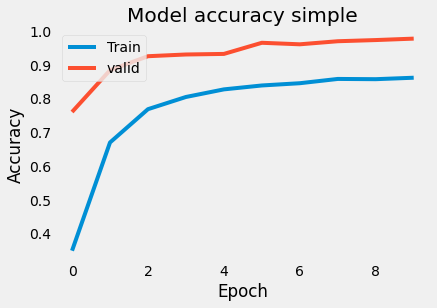

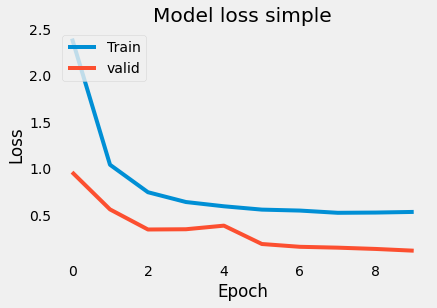

In [ ]:
plt.plot(history_model_batched.history['accuracy'])
plt.plot(history_model_batched.history['val_accuracy'])
plt.title('Model accuracy simple')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'valid'], loc='upper left')
plt.grid()
plt.show()

# Plot training & validation loss values
plt.plot(history_model_batched.history['loss'])
plt.plot(history_model_batched.history['val_loss'])
plt.title('Model loss simple')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'valid'], loc='upper left')
plt.grid()
plt.show()

In [ ]:

model_no_batch = create_drop_out_model()
model_no_batch.compile(optimizer='RMSprop',loss='categorical_crossentropy', metrics=['accuracy'])
history_model_no_batch = model_no_batch.fit(X_train, y_train, validation_data=(X_val, y_val), epochs = 10)


Epoch 1/10
858/858 [==============================] - 48s 55ms/step - loss: 2.5304 - accuracy: 0.2879 - val_loss: 1.4283 - val_accuracy: 0.5750
Epoch 2/10
858/858 [==============================] - 46s 54ms/step - loss: 1.2878 - accuracy: 0.5855 - val_loss: 0.6075 - val_accuracy: 0.8366
Epoch 3/10
858/858 [==============================] - 48s 56ms/step - loss: 0.7820 - accuracy: 0.7476 - val_loss: 0.2904 - val_accuracy: 0.9201
Epoch 4/10
858/858 [==============================] - 48s 56ms/step - loss: 0.5832 - accuracy: 0.8132 - val_loss: 0.2222 - val_accuracy: 0.9584
Epoch 5/10
858/858 [==============================] - 49s 57ms/step - loss: 0.4820 - accuracy: 0.8455 - val_loss: 0.1342 - val_accuracy: 0.9776
Epoch 6/10
858/858 [==============================] - 49s 57ms/step - loss: 0.4180 - accuracy: 0.8745 - val_loss: 0.1084 - val_accuracy: 0.9839
Epoch 7/10
858/858 [==============================] - 49s 57ms/step - loss: 0.3781 - accuracy: 0.8850 - val_loss: 0.1117 - val_accuracy:

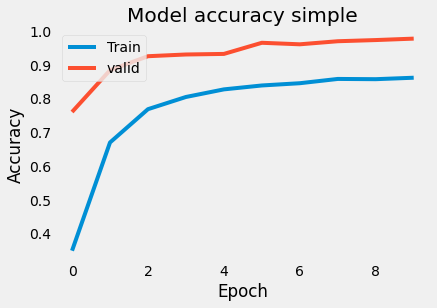

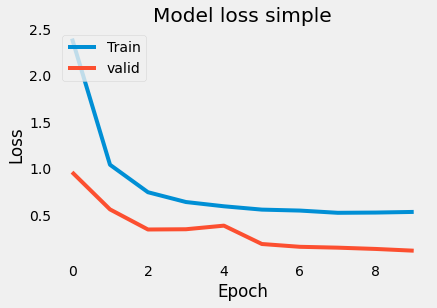

In [ ]:
plt.plot(history_model_batched.history['accuracy'])
plt.plot(history_model_batched.history['val_accuracy'])
plt.title('Model accuracy simple')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'valid'], loc='upper left')
plt.grid()
plt.show()

# Plot training & validation loss values
plt.plot(history_model_batched.history['loss'])
plt.plot(history_model_batched.history['val_loss'])
plt.title('Model loss simple')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'valid'], loc='upper left')
plt.grid()
plt.show()

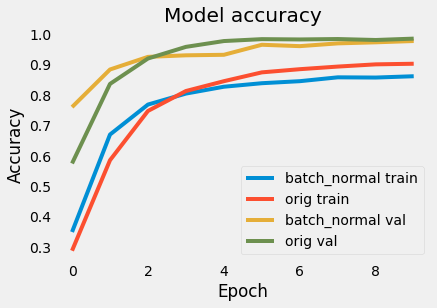

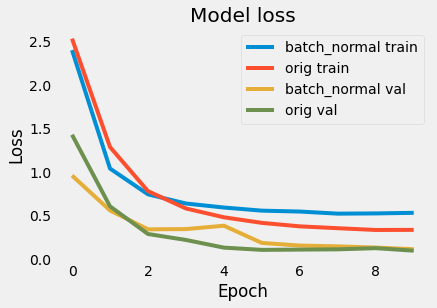

In [ ]:
plt.plot(history_model_batched.history['accuracy'])
plt.plot(history_model_no_batch.history['accuracy'])
plt.plot(history_model_batched.history['val_accuracy'])
plt.plot(history_model_no_batch.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['batch_normal train', 'orig train', 'batch_normal val', 'orig val'])
plt.grid()
plt.show()

plt.plot(history_model_batched.history['loss'])
plt.plot(history_model_no_batch.history['loss'])
plt.plot(history_model_batched.history['val_loss'])
plt.plot(history_model_no_batch.history['val_loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['batch_normal train', 'orig train', 'batch_normal val', 'orig val'], loc='upper right')
plt.grid()
plt.show()



در این قسمت از ما خواسته معیارهای ارزیابی را بر روی داده های تست برای بهترین مدل خود گزارش دهیم

In [ ]:
from keras.models import load_model
loaded_model = load_model("/content/drive/MyDrive/hw03/TrainedModel4.h5")

In [ ]:
from sklearn.metrics import classification_report

y_pred = loaded_model.predict(X_test)

y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(labels, axis=1)

confusion_matrix(y_pred,y_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.80      0.88        60
           1       0.94      0.98      0.96       720
           2       0.96      0.95      0.96       750
           3       0.94      0.95      0.95       450
           4       0.96      0.99      0.97       660
           5       0.92      0.90      0.91       630
           6       0.99      0.83      0.91       150
           7       0.95      0.91      0.93       450
           8       0.95      0.96      0.95       450
           9       0.96      0.96      0.96       480
          10       1.00      0.98      0.99       660
          11       0.97      0.95      0.96       420
          12       0.96      0.97      0.97       690
          13       0.98      0.99      0.99       720
          14       1.00      1.00      1.00       270
          15       0.96      1.00      0.98       210
          16       0.96      0.99      0.97       150
          17       1.00    